# Вариант №9. Работу выполнил Бабиков Сергей БПИ-172

In [13]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

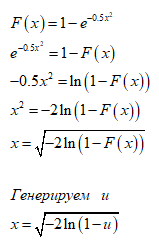

In [14]:
def Gen(count):
    arr = np.zeros(count)
    for i in range(count):
        k = random.random()
        #Не F(x), а F(x)^(-1), тк распределена на отрезке [0,1]
        arr[i] = math.sqrt(-2*math.log(1 - k))
    return arr

(array([ 82., 199., 269., 221., 131.,  65.,  17.,  10.,   4.,   2.]),
 array([0.01796408, 0.43472529, 0.85148651, 1.26824772, 1.68500894,
        2.10177016, 2.51853137, 2.93529259, 3.3520538 , 3.76881502,
        4.18557623]),
 <a list of 10 Patch objects>)

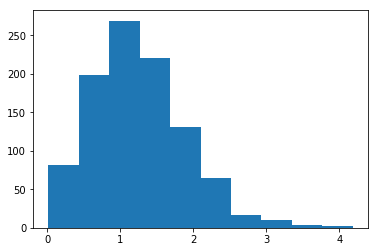

In [15]:
#Пункт 1.1
plt.hist(x = Gen(1000), bins = 10)

In [16]:
#Выяснить формулу
def Check(count):
    y = Gen(count)
    ym = y.mean()
    ys = y.std()**2 * y.shape[0] / (y.shape[0]  - 1)
    t = sc.t.ppf(0.975, count - 1)
    lhv = ym - t * (math.sqrt(ys) / math.sqrt(count))
    rhv = ym + t * (math.sqrt(ys) / math.sqrt(count))
    E = 1.2533
    return E > lhv and E < rhv

объем выборки 10 =  0.941
объем выборки 15 =  0.944
объем выборки 20 =  0.949
объем выборки 25 =  0.941
объем выборки 30 =  0.947


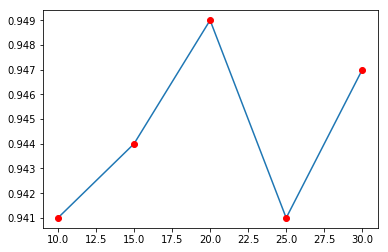

In [17]:
#Где рассчитывается доля попаданий
#Пункт 1.2
countTrueList = []
for i in range(10, 35, 5):
    countTrue = 0
    for j in range(1000):
        if Check(i):
            countTrue += 1
    countTrueList.append(countTrue / 1000)
#Пункт 1.3
print('объем выборки 10 = ', countTrueList[0])
print('объем выборки 15 = ', countTrueList[1])
print('объем выборки 20 = ', countTrueList[2])
print('объем выборки 25 = ', countTrueList[3])
print('объем выборки 30 = ', countTrueList[4])
plt.plot([0 + i for i in range(10, 35, 5)], countTrueList)
plt.plot([0 + i for i in range(10, 35, 5)], countTrueList, 'ro')

In [18]:
#z1 = 2456, a = 113, b = 2, m = 10000
def LinearCongruentialGenerator(count):
    arr = np.empty(count)
    arr[0] = 2456
    a = 113
    b = 2
    m = 10000
    for i in range(1, count):
        arr[i] = ((a * arr[i - 1] + b) % m)
    return arr / m

[0.2456 0.753  0.0892 0.0798 0.0176 0.989  0.7572 0.5638 0.7096 0.185 ]


(array([10.,  5.,  9., 13.,  6., 13., 12., 12.,  8., 12.]),
 array([0.0132 , 0.11164, 0.21008, 0.30852, 0.40696, 0.5054 , 0.60384,
        0.70228, 0.80072, 0.89916, 0.9976 ]),
 <a list of 10 Patch objects>)

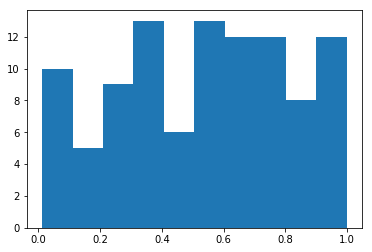

In [19]:
#Пункты 2.1 - 2.3
first = LinearCongruentialGenerator(100)
print(first[:10])
plt.hist(x = first, bins = 10)

In [27]:
def checkR(array):
    array.sort()
    fn = [i / array.shape[0] for i in range(array.shape[0])]
    sup = max(abs(array - fn))
    sup2 = max(abs(array[:array.shape[0] - 1] - fn[1:]))
    supi = max(sup, sup2)
    ks = math.sqrt(array.shape[0]) * supi
    ksa = math.sqrt((-1/2) * np.log(0.05/2))
    print(f"ks = {ks}\nksa = {ksa}")
    return ks <= ksa

In [28]:
#Пункт 2.4
checkR(first)

ks = 1.0099999999999998
ksa = 1.3581015157406195


True

[0.2456 0.753  0.0892 0.0798 0.0176 0.989  0.7572 0.5638 0.7096 0.185 ]


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0.001  , 0.10088, 0.20076, 0.30064, 0.40052, 0.5004 , 0.60028,
        0.70016, 0.80004, 0.89992, 0.9998 ]),
 <a list of 10 Patch objects>)

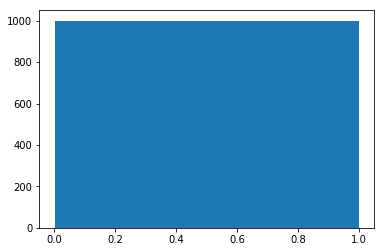

In [29]:
#Пункт 2.5
second = LinearCongruentialGenerator(10000)
print(second[:10])
plt.hist(x = second)

In [30]:
checkR(second)

ks = 0.14000000000000679
ksa = 1.3581015157406195


True